In [1]:
import shutil
import pandas as pd
import numpy as np
import SimpleITK as sitk
import os
from tqdm.notebook import tqdm
import cv2

import matplotlib.pyplot as plt

import torch
from torch.utils.data import Dataset, DataLoader

from trainer.utils import split_mask, open_ct, open_mask
from trainer.loader import Ds
from trainer.Trainer import Trainer
from nonlocalunet.models import NonLocalUnet, NonLocalUnetBuilder
from torchmed.images import to_numpy

import seaborn as sns

In [2]:
val_indexes = list(range(0,1))
train_indexes = list(range(1, 139))
shape = [8, 96, 96]
train_batch_size = 8
val_batch_size = 2

train_ds = Ds(train_indexes, shape)
train_dl = DataLoader(train_ds, batch_size=train_batch_size, shuffle=True, num_workers=32)

val_ds = Ds(val_indexes, shape)
val_dl = DataLoader(val_ds, batch_size=val_batch_size, shuffle=True, num_workers=8)

In [3]:
device = 'cuda:1'
depth = 3
init_filters = 32
lr = 0.0005
model = NonLocalUnetBuilder(1, 7, depth=depth, init_filters=init_filters)
model = torch.nn.DataParallel(model, device_ids=[1, 0, 2, 3], output_device=device)
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr = lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer)
criterion = torch.nn.BCELoss()

name = f'{shape} b{train_batch_size} lr{lr} depth{depth} filt{init_filters}'

In [4]:
trainer = Trainer(model, 7, optimizer, scheduler, criterion, train_dl, val_indexes, device, name)

In [ ]:
trainer.train(1000)

Epoch:   0%|          | 0/1000 [00:00<?, ?it/s]

Train:   0%|          | 0/18 [00:00<?, ?it/s]

Train:   0%|          | 0/18 [00:00<?, ?it/s]

Train:   0%|          | 0/18 [00:00<?, ?it/s]

Train:   0%|          | 0/18 [00:00<?, ?it/s]

Train:   0%|          | 0/18 [00:00<?, ?it/s]

Val:   0%|          | 0/1 [00:00<?, ?it/s]

Train:   0%|          | 0/18 [00:00<?, ?it/s]

Train:   0%|          | 0/18 [00:00<?, ?it/s]

Train:   0%|          | 0/18 [00:00<?, ?it/s]

Train:   0%|          | 0/18 [00:00<?, ?it/s]

Train:   0%|          | 0/18 [00:00<?, ?it/s]

Val:   0%|          | 0/1 [00:00<?, ?it/s]

Train:   0%|          | 0/18 [00:00<?, ?it/s]

In [9]:
a, b = next(iter(train_dl))

In [10]:
pred = model(a.to('cuda').float())

<AxesSubplot:ylabel='Count'>

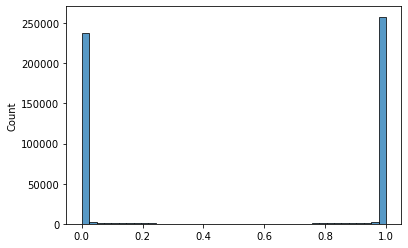

In [11]:
sns.histplot(to_numpy(pred.flatten()))